# Adding Dependences

In [2]:
using DelimitedFiles
using Images, FileIO
using Plots

# Extract Matrix From Image

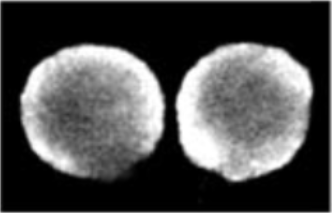

In [3]:
img = load("1.png")

## Extracting the grayscale on the image

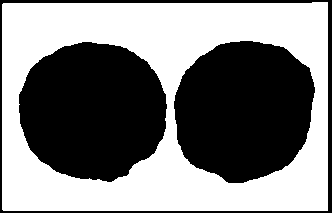

In [4]:
Gray_img = .! (Gray.(img) .> 0.1)
Gray.(Gray_img)

# Extracting the Contour on the image

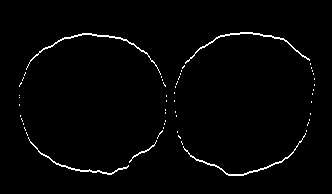

In [5]:
reduce = 10
Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,:]
Gray.(Gray_img_contour)

# Extracting the index of each point

In [6]:
idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

1162×2 Matrix{Int64}:
  20   86
  20   87
  20   96
  20   98
  20  105
  20  106
  21   84
  21   85
  21  116
  21  117
  22   83
  22   84
  22  119
   ⋮  
 313   71
 313   72
 313   94
 313   95
 314   74
 314   75
 314   90
 314   91
 315   79
 315   80
 315   85
 315   86

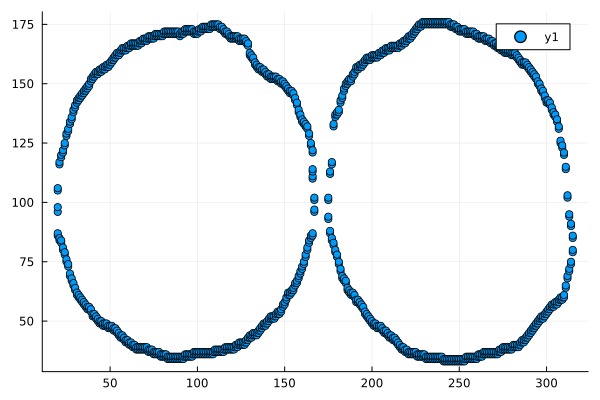

In [7]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

In [8]:
Gray_img

213×332 BitMatrix:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  0  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 0  0  1  1  1  1  1  1  1  1  1  1  1     1 

In [9]:
# In X
sum_x = sum(Gray_img, dims=1) .* collect(1:size(Gray_img,2))'
x_c = sum(sum_x) / sum(Gray_img)

# In Y
sum_y = sum(Gray_img, dims=2) .* collect(1:size(Gray_img,1))
y_c = sum(sum_y) / sum(Gray_img)

center_of_mass = hcat(x_c,y_c)

1×2 Matrix{Float64}:
 163.413  104.168

# Putting the index in the center of mass

In [10]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

1162×2 Matrix{Float64}:
 -143.413  -18.1676
 -143.413  -17.1676
 -143.413   -8.16759
 -143.413   -6.16759
 -143.413    0.832409
 -143.413    1.83241
 -142.413  -20.1676
 -142.413  -19.1676
 -142.413   11.8324
 -142.413   12.8324
 -141.413  -21.1676
 -141.413  -20.1676
 -141.413   14.8324
    ⋮      
  149.587  -33.1676
  149.587  -32.1676
  149.587  -10.1676
  149.587   -9.16759
  150.587  -30.1676
  150.587  -29.1676
  150.587  -14.1676
  150.587  -13.1676
  151.587  -25.1676
  151.587  -24.1676
  151.587  -19.1676
  151.587  -18.1676

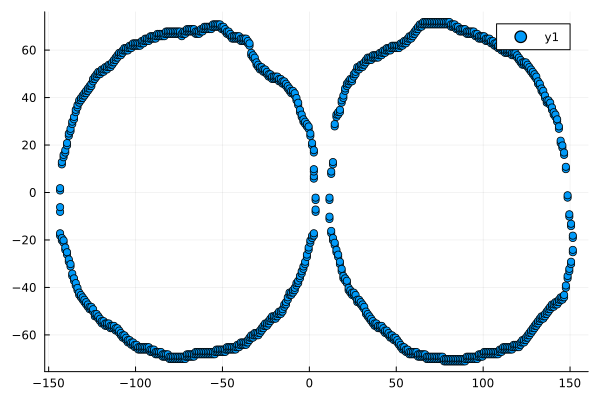

In [11]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [22]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = 180/pi .* (atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]) .+ 90
center_idx_cil_coord = hcat(θ,r)

1162×2 Matrix{Float64}:
 277.22    144.559
 276.826   144.436
 273.26    143.645
 272.463   143.545
  89.6674  143.415
  89.268   143.424
 278.06    143.833
 277.665   143.697
  85.2505  142.903
  84.8511  142.99
 278.513   142.988
 278.117   142.843
  84.0123  142.188
   ⋮       
 257.498   153.22
 257.864   153.007
 266.112   149.933
 266.493   149.868
 258.672   153.58
 259.038   153.386
 264.625   151.252
 265.003   151.162
 260.573   153.663
 260.942   153.502
 262.793   152.794
 263.166   152.672

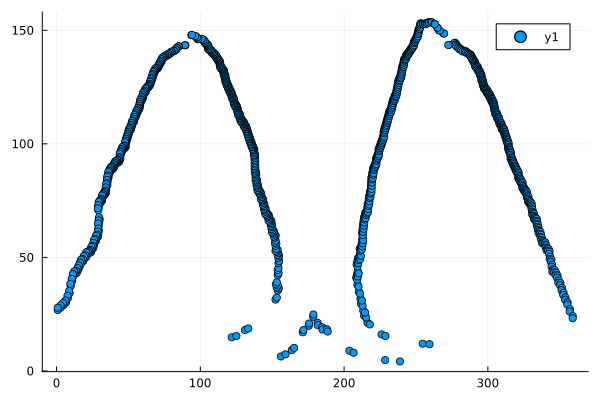

In [23]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)

In [16]:
findmin(center_idx_cil_coord[:,1])

(-1.5559756467304973, 578)

In [17]:
findmax(center_idx_cil_coord[:,1])

(4.6953212729081955, 575)